<a href="https://colab.research.google.com/github/enjoyPG/2023Gifted/blob/main/students/jwoo428/20230303/%EC%9D%B4%EC%A4%80%EC%9A%B0_4_1%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#로지스틱 회귀


##핵심 키워드
###로지스틱 회귀
* 선형방정식을 사용한 분류 알고리즘
* 선형회귀와 달리 시그모이드 함수나 소프트맥스함수를 사용하여 클래스 확률 출력
###다중 분류
* 타깃클래스가 2개 이상인 분류 문제
* 로지스틱 회귀는 다중분류를 위해 소프트맥스 함수를 사용하여 클래스를 예측
###시그모이드 함수
* 선형방정식의 출력을 0과 1 사이의 값으로 압축하며 이진 분류를 위해 사용함
###소프트맥스 함수
* 다중분류에서 여러 선형 방정식의 출력 결과를 정규화하여 합이 1이 되도록 함

###데이터준비
* pandas 이용(문서데이터)
* read_csv = 데이터프레임 변환
* head()=첫5개 행 출력

In [1]:
import pandas as pd

In [2]:
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


* unique()함수로 고유값 추출


In [3]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


* 원하는 열을 리시트로 나열

In [4]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()

In [5]:
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


* target data

In [6]:
fish_target = fish['Species'].to_numpy()

* 머신러닝 = 기본적으로 데이터 세트 2개가 필요

In [7]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target,random_state=42)

* StandardScaler클래스 사용 - 훈련세트와 데이터세트 표준화

In [9]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

### k-최근접 이웃 분류기의 확률 예측

In [10]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


* fish데이터프레임에 7개의 생선, 훈련세트와 테스트세트의 타깃 데이터에도 7개 종류, 이렇게 타깃데이터에 2개이상의 클래스가 포함된 문제를 '다중분류'라고 부름

* 타깃값을 사이킷런 모델에 전달하면 순서가 알파벳순으로 정렬됨

In [11]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [12]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


* decimals 매개변수 = 소수점 아래 자릿수 지정가능

In [14]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


* 네번째 샘플의 최근접이웃의 클래스

In [15]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


##로지스틱회귀는 분류모델이다.
##선형회귀와 동일하게 선형방정식을 학습함
* z = a * (Weight) + b * (Length) + c * (Diagonal) + d * (Height) + e * (Width) + f

* 확률이 되려면 z가 아주 큰음수 일때 0, z가 아주 큰 양수일 때 1이 되야함
* 시그모이드 함수(로지스틱함수)를 사용하면 가능

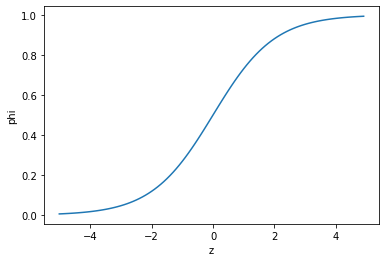

In [17]:
#np.exp() = 지수 함수 계산
import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5,5,0.1)
phi = 1 / (1+np.exp(-z))
plt.plot(z,phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

* 불리언 인덱싱

In [18]:
char_arr = np.array(['A','B','C','D','E'])
print(char_arr[[True,False,True,False,False]])

['A' 'C']


In [19]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [22]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [23]:
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [25]:
print(lr.classes_)

['Bream' 'Smelt']


In [26]:
print(lr.coef_,lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [28]:
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [29]:
from scipy.special import expit
print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


##로지스틱회귀로 다중분류 수행하기

In [30]:
lr = LogisticRegression(C = 20, max_iter=1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled,test_target))

0.9327731092436975
0.925


In [31]:
print(lr.predict(test_scaled[:5]))


['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [32]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba,decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


* 소프트맥스함수 = 정규화된 지수 함수

In [33]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision,decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [34]:
from scipy.special import softmax
proba = softmax(decision, axis =1)
print(np.round(proba,decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
